# <목차>

## 1. [y 일별 변화 추이](#y-일별-변화-추이)
## 2. [y사이의 관계](#y사이의-관계)
## 3. [y 연도별 분포](#y-연도별-분포)
## 4. [총 정리](#총-정리)

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.chdir('/content/drive/MyDrive/dacon/daconcup/')
import utils

In [134]:
data = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/train.csv', encoding='cp949')
info_user = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/info_user.csv', encoding='cp949')
info_login = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/info_login.csv', encoding='cp949')
info_cpt = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/info_competition.csv', encoding='cp949')
info_sub = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/info_submission.csv', encoding='cp949')

# y 일별 변화 추이

1) 점점 사용량이 많아짐. 

- 최근 몇 달 데이터만 사용하는 것이 유의미할 것으로 판단됨.(baseline에서는 한달 사용)

2) 사용자 수와 세션 수의 분포 매우 비슷 

- 두 y값을 결정하는 요인이 비슷할 듯.

- 두 변수에 차이를 만드는 input은 무엇일까?

3) 뾰족뾰족한 분포를 보이는 것을 보니 요일 영향을 받는 것으로 판단 됨

- 변수로 `isHoliday` 사용

- 모든 y가 공휴일에 더 적은 수의 분포를 보임 

- 요일도 확인해보았으나 평일, 주말로 나뉘어져서 공휴일만 변수로 사용하겠음

In [135]:
# train 데이터 확인
display(data.info())
print('='*50)
data['date'] = pd.to_datetime(data['DateTime'].apply(lambda x: x[:10])) # date 변수 생성
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  19008 non-null  object
 1   사용자       19008 non-null  int64 
 2   세션        19008 non-null  int64 
 3   신규방문자     19008 non-null  int64 
 4   페이지뷰      19008 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 742.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  19008 non-null  object        
 1   사용자       19008 non-null  int64         
 2   세션        19008 non-null  int64         
 3   신규방문자     19008 non-null  int64         
 4   페이지뷰      19008 non-null  int64         
 5   date      19008 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 891.1+ KB


None

In [136]:
# y 변수 일별 분포
df = data.groupby('date')[['사용자', '세션', '신규방문자', '페이지뷰']].sum()
df.columns = ['sum_user', 'sum_sess', 'sum_new', 'sum_views']
df = df.reset_index()

fig = make_subplots(shared_xaxes=True,rows=4, cols=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['sum_user'], name='# of users'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['sum_sess'], name='# of sessions'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['sum_new'], name='# of new_users'), row=3, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['sum_views'], name='# of page views'), row=4, col=1)

In [137]:
# 공휴일 여부에 따른 분포 추이
data = utils.add_isHoliday_column(data)
df = utils.add_isHoliday_column(df)

df_weekday = df[df['isHoliday'] == 0]
df_holiday = df[df['isHoliday'] == 1]

In [138]:
# 사용자 수, 세션 수
fig = make_subplots(rows=4, cols=1)
fig.add_trace(go.Scatter(x=df_weekday['date'], y=df_weekday['sum_user'], name='not holiday(사용자 수)'),  row=1, col=1)
fig.add_trace(go.Scatter(x=df_holiday['date'], y=df_holiday['sum_user'], name='holiday(사용자 수)'),  row=2, col=1)
fig.add_trace(go.Scatter(x=df_weekday['date'], y=df_weekday['sum_sess'], name='not holiday(세션 수)'),  row=3, col=1)
fig.add_trace(go.Scatter(x=df_holiday['date'], y=df_holiday['sum_sess'], name='holiday(세션 수)'),  row=4, col=1)

In [139]:
# 신규 방문자 수, 페이지 뷰 수
fig = make_subplots(rows=4, cols=1)
fig.add_trace(go.Scatter(x=df_weekday['date'], y=df_weekday['sum_new'], name='not holiday(신규 방문자 수)'),  row=1, col=1)
fig.add_trace(go.Scatter(x=df_holiday['date'], y=df_holiday['sum_new'], name='holiday(신규 방문자 수)'),  row=2, col=1)
fig.add_trace(go.Scatter(x=df_weekday['date'], y=df_weekday['sum_views'], name='not holiday(페이지 뷰 수)'),  row=3, col=1)
fig.add_trace(go.Scatter(x=df_holiday['date'], y=df_holiday['sum_views'], name='holiday(페이지 뷰 수)'),  row=4, col=1)

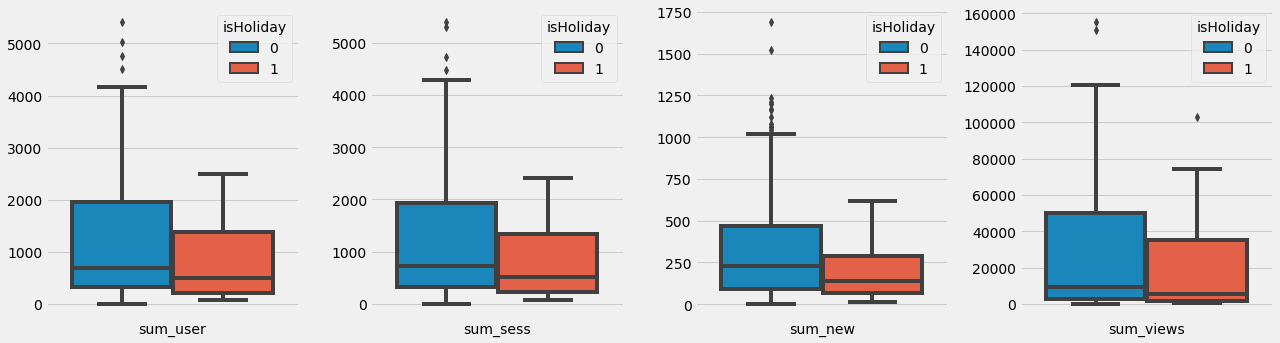

In [216]:
# 휴일 여부에 따른 y분포 차이 보기
new_df = pd.melt(df.loc[:, ['date', 'sum_user', 'sum_sess', 'sum_new', 'sum_views', 'isHoliday']], id_vars=['date', 'isHoliday'])

fig, axes = plt.subplots(1, 4, figsize=(18,5))

i = 0
for col in ['sum_user', 'sum_sess', 'sum_new', 'sum_views']:
    sns.boxplot(data=new_df.loc[new_df['variable']==col, :], x='variable', y='value', hue='isHoliday', ax=axes[i])
    axes[i].set_xlabel('') # Hide xlabel
    axes[i].set_ylabel('') # Hide ylabel
    i+=1
plt.tight_layout();

- 휴일 여부에 따라 y분포에 차이가 있음

# y사이의 관계 

1) 전체 사용자 대비 신규 사용자 비율

- 2020년 이후에 신규 사용자 비율이 줄어듦

- `사용자 수`와 `신규 사용자 수`는 서로에게 유의미한 변수 -- 그러나 2020년 전 후로 영향력이 다르기 때문에 2020년 이후 데이터만 사용해야 함

2) 사용자의 1명당 평균 페이지 뷰수

- 2020년 2월부터 페이지뷰수가 급증함. 대회 정보로 확인해야 함!! -> 원인 불명

- 대회 정보 : 2019년 11월 이후에는 약 2개 이상의 대회가 계속 진행중

3) 대회 참가자 수와 y

- y끼리 상관관계 높음

- 대회 참가자 수와 y의 상관관계 높음(신규 유저수가 제일 낮음 0.64)

- `대회 참가자 수`를 변수로 사용하기


In [140]:
# 1) 전체 사용자 대비 신규 사용자 비율
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['sum_new']/df['sum_user'], name='신규 사용자 비율'))
fig.add_trace(go.Scatter(x=df['date'], y=(df['sum_new']/df['sum_user']).rolling(window=7, min_periods=1).mean(), name='이동 평균 7일'))
fig.add_shape(type="line",
    x0=min(df['date']), y0=1, x1=max(df['date']), y1=1,
    line=dict(
        color="tomato",
        width=4,
        dash="dot",
    ))
fig.update_layout(
    title="<신규 사용자 비율>",
    width=1200,
    height=400)
fig.show();

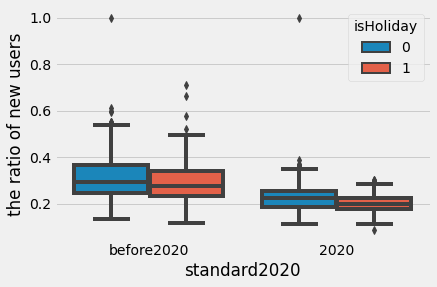

In [141]:
df['standard2020'] = df.apply(lambda x: 1 if int(x['date'].year) >= 2020 else 0, axis=1)
plt.style.use('fivethirtyeight')
ax = sns.boxplot(x=df['standard2020'], y=df['sum_new']/df['sum_user'], hue=df['isHoliday'])
ax.set(xticklabels=['before2020', '2020'], ylabel='the ratio of new users');

- 2020년 이후에 신규 사용자 비율이 줄었음
- 기존 사용자의 비율이 늘었거나 가입자 수가 늘어서 이런 효과가 나타난 것일 수 있음
- 사용자 수와 신규 사용자 수는 서로에게 영향을 줌. 서로의 feature로 사용 가능
- 주말에는 신규 사용자 비율이 더 줄어듦(아래 t-test를 보면 2020년만 유의미하게 나옴)

In [142]:
# 2020년을 기준으로 신규 사용자 수가 줄어들었다는 사실이 유의미한지 독립표본 t-test로 확인 -> 유의미함
    ## H0: 두 모집단의 모평균이 같다
    ## H1: 두 모집단의 모평균이 같지않다
import scipy.stats
dat_before2020 = (df['sum_new']/df['sum_user'])[df['date'].apply(lambda x: int(x.year)<2020)]
dat_2020 = (df['sum_new']/df['sum_user'])[df['date'].apply(lambda x: int(x.year)>=2020)]
scipy.stats.ttest_ind(dat_before2020, dat_2020, equal_var=False)

Ttest_indResult(statistic=15.114216139859648, pvalue=1.6534886376473663e-45)

In [143]:
dat_before2020_holi = (df['sum_new']/df['sum_user'])[df.apply(lambda x: int(x['date'].year)<2020 and x['isHoliday']==1, axis=1)]
dat_before2020_notholi = (df['sum_new']/df['sum_user'])[df.apply(lambda x: int(x['date'].year)<2020 and x['isHoliday']==0, axis=1)]
scipy.stats.ttest_ind(dat_before2020_holi, dat_before2020_notholi, equal_var=False)

Ttest_indResult(statistic=-1.4804965464550115, pvalue=0.14001490350244614)

In [144]:
dat_2020_holi = (df['sum_new']/df['sum_user'])[df.apply(lambda x: int(x['date'].year)>=2020 and x['isHoliday']==1, axis=1)]
dat_2020_notholi = (df['sum_new']/df['sum_user'])[df.apply(lambda x: int(x['date'].year)>=2020 and x['isHoliday']==0, axis=1)]
scipy.stats.ttest_ind(dat_2020_holi, dat_2020_notholi, equal_var=False)

Ttest_indResult(statistic=-4.13827491195672, pvalue=4.666519534222419e-05)

In [145]:
# 2) 사용자 1명당 페이지 뷰수
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['date'], y=df['sum_views']/df['sum_user'], name='페이지 뷰수'))
fig.update_layout(
    title="<사용자 1명당 평균 페이지 뷰수>",
    width=1200,
    height=400)
fig.show();

2020년 2월부터 갑자기 1인당 페이지 뷰수가 급증함. 이유가 뭘까? 대회정보를 확인해봐야할 

In [146]:
# 날짜는 날짜형태로 변경
info_cpt['period_start'] = pd.to_datetime(info_cpt['period_start'])
info_cpt['period_end'] = pd.to_datetime(info_cpt['period_end'])
info_cpt['merge_deadline'] = pd.to_datetime(info_cpt['merge_deadline'])

# 날짜별 시행 대회 수
min_date = min(info_cpt['period_start'])
max_date = max(info_cpt['period_end'])
cnt_cpt_df = pd.DataFrame()
cnt_cpt_df['date'] = pd.date_range(min_date, max_date)
for idx, row in info_cpt.iterrows():
    date_interval = pd.date_range(row['period_start'].date(), row['period_end'].date())
    col_name = row['name']
    
    cnt_cpt_df[col_name] = 0
    cnt_cpt_df.loc[cnt_cpt_df['date'].apply(lambda x: x in date_interval), col_name] = row['']

# print(np.sum(cnt_cpt_df, axis=0)) # 각 대회별로 기간에 맞게 잘 들어갔나 확인
cnt_cpt_df['cnt_cpt'] = np.sum(cnt_cpt_df.iloc[:, 1:], axis=1)
df = df.merge(cnt_cpt_df.loc[:, ['date', 'cnt_cpt']], on='date', how='left')

In [153]:
# 대회 수 시각화
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df['date'], y=df['sum_views']/df['sum_user'], name='페이지 뷰수'), secondary_y=False)
fig.add_trace(go.Scatter(x=df['date'], y=df['cnt_cpt'], name='대회 수'), secondary_y=True)
fig.update_layout(
    width=1200,
    height=400)
fig.show();

- 1인당 페이지뷰수가 급증한 원인 찾지 못함.

- 2019년 11월 이후에는 약 2개 이상의 대회가 계속 진행중임 

In [154]:
# 날짜별 시행 대회 참가자 수
for idx, row in info_cpt.iterrows():
    date_interval = pd.date_range(row['period_start'].date(), row['period_end'].date())
    col_name = row['name']
    
    cnt_cpt_df[col_name] = 0
    cnt_cpt_df.loc[cnt_cpt_df['date'].apply(lambda x: x in date_interval), col_name] = row['participants']
cnt_cpt_df['total_participants'] = np.sum(cnt_cpt_df.iloc[:, 1:], axis=1)
df = df.merge(cnt_cpt_df.loc[:, ['date', 'total_participants']], on='date', how='left')

In [179]:
# 대회 참가자 수 시각화

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df['date'], y=df['sum_views']/df['sum_user'], name='페이지 뷰수'), secondary_y=False)
fig.add_trace(go.Scatter(x=df['date'], y=df['total_participants'], name='대회 참가자 수'), secondary_y=True)
fig.update_layout(
    title='<1인당 페이지 뷰수>',
    width=1200,
    height=400)
fig.show();

- 대회 수보다는 참가자수가 1인당 페이지 뷰수와 더 관련성 있어보임

In [171]:
# y와 대회 참가자 수
fig = make_subplots(rows=4, cols=1, specs=[[{"secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_weekday['date'], y=df_weekday['sum_new'], name='not holiday(신규 방문자 수)'), secondary_y=False,  row=1, col=1)
fig.add_trace(go.Scatter(x=df_holiday['date'], y=df_holiday['sum_new'], name='holiday(신규 방문자 수)'), secondary_y=False,  row=2, col=1)
fig.add_trace(go.Scatter(x=df_weekday['date'], y=df_weekday['sum_views'], name='not holiday(페이지 뷰 수)'), secondary_y=False,  row=3, col=1)
fig.add_trace(go.Scatter(x=df_holiday['date'], y=df_holiday['sum_views'], name='holiday(페이지 뷰 수)'), secondary_y=False,  row=4, col=1)

for i in range(1, 5):
    fig.add_trace(go.Scatter(x=df['date'], y=df['total_participants'], name='대회 참가자 수', marker=dict(color='grey')), secondary_y=True, row=i, col=1)

fig.update_layout(
    width=1200,
    height=1000)

fig.show();

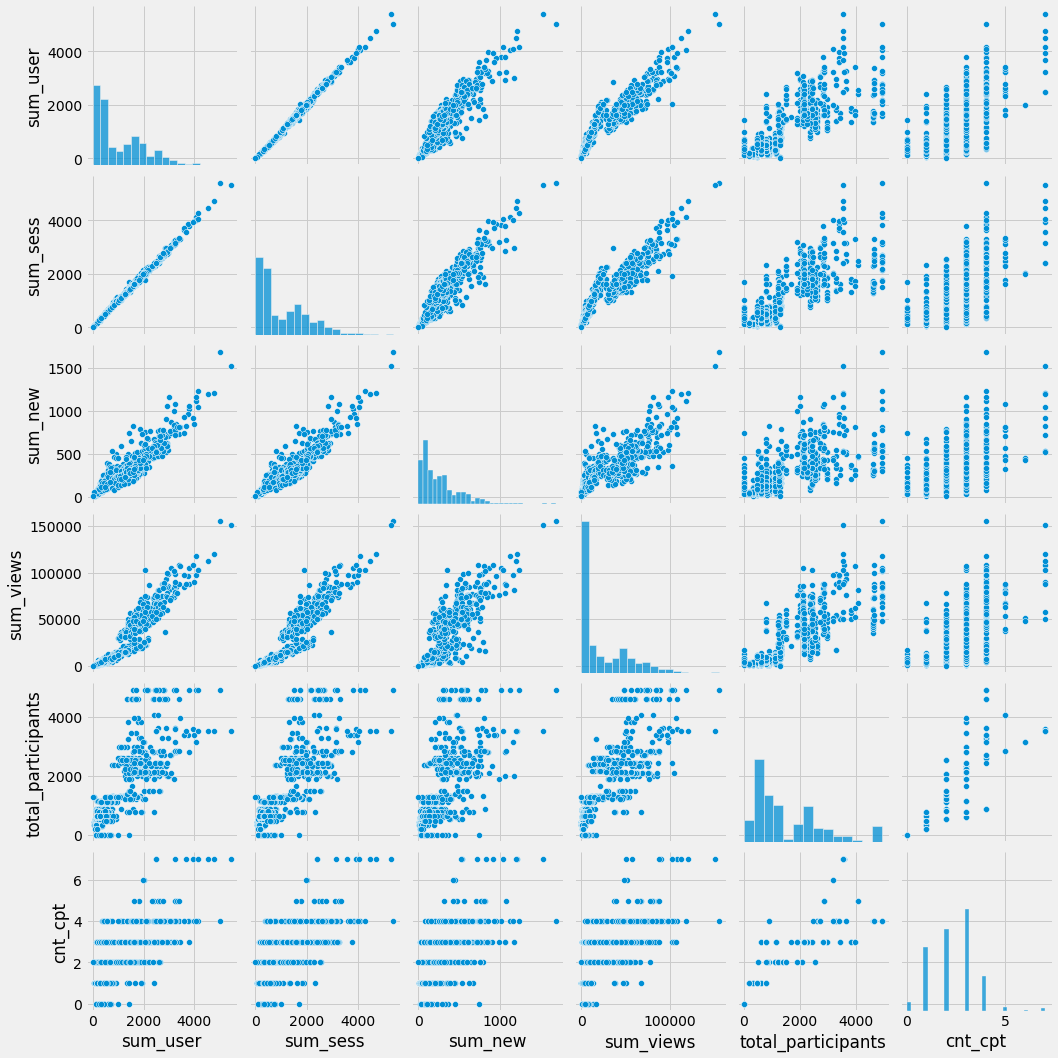

In [232]:
sns.pairplot(df.loc[:, ['sum_user', 'sum_sess', 'sum_new', 'sum_views', 'total_participants', 'cnt_cpt']]);

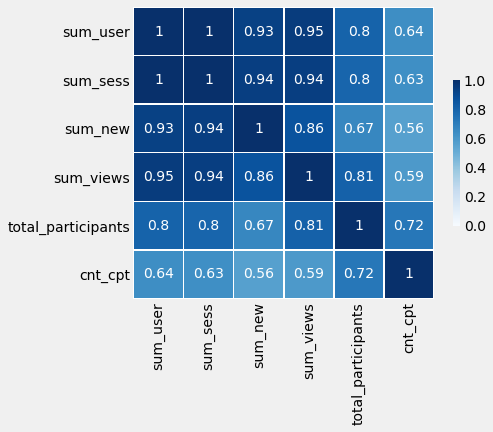

In [235]:
fig, ax = plt.subplots( figsize=(6,5) )

sns.heatmap(df.loc[:, ['sum_user', 'sum_sess', 'sum_new', 'sum_views', 'total_participants', 'cnt_cpt']].corr(), 
            cmap='Blues', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = 0,vmax = 1   # 컬러바 범위
           ) ;

- `대회 참가자 수`는 `사용자수`, `세션수`, `페이지 뷰수`와 상관관계가 0.8이상으로 선형관계가 있다고 볼 수 있음

- `대회 수`와 y도 약간의 선형 관계를 나타내지만 `대회 수`와 `대회 참가자 수`의 선형관계가 더 큼. 따라서 둘 사이에 관계가 있으므로 `대회 참가자 수`만 변수로 사용하겠음 

# y 연도별 분포

- dacon의 이용량이 2018, 2019, 2020으로 갈수록 가파르게 상승함

- 해당 연도의 분포를 나타내는 변수 추가하기 - 분산, 평균, 중앙값 같은 요소(ML모델에서만)

- 분기에 따라 y값에 차이가 있는지는 알 수 없음

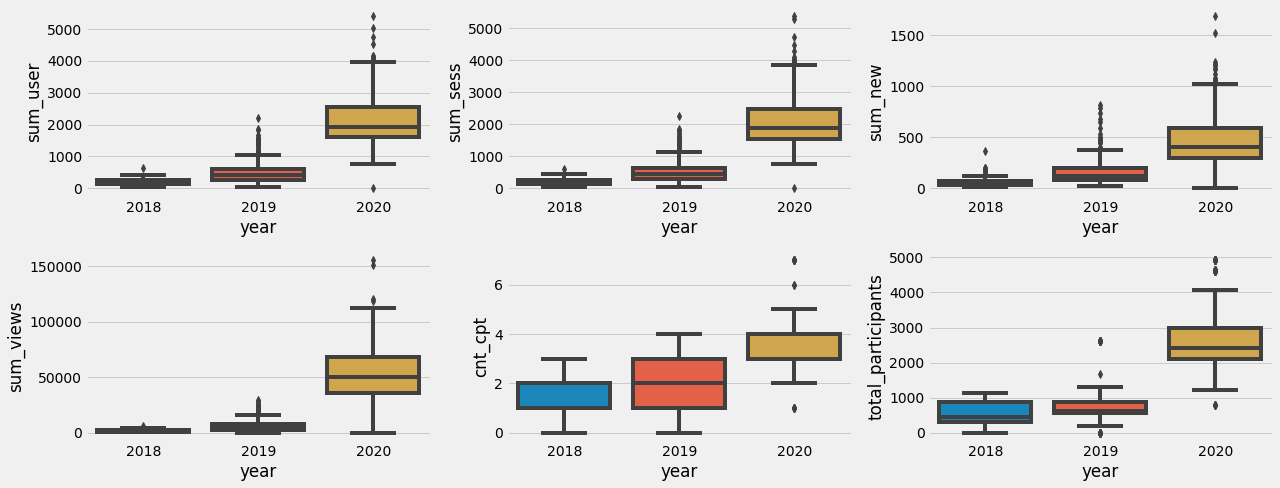

In [244]:
# 연도별 분포
df['year'] = df['date'].dt.year


fig, axes = plt.subplots(2, 3, figsize=(18,7))
axes = axes.flatten()

cols = ['sum_user', 'sum_sess', 'sum_new', 'sum_views', 'cnt_cpt', 'total_participants']
for i in range(len(cols)):
    sns.boxplot(data=df, x='year', y=cols[i], ax=axes[i])
plt.tight_layout();

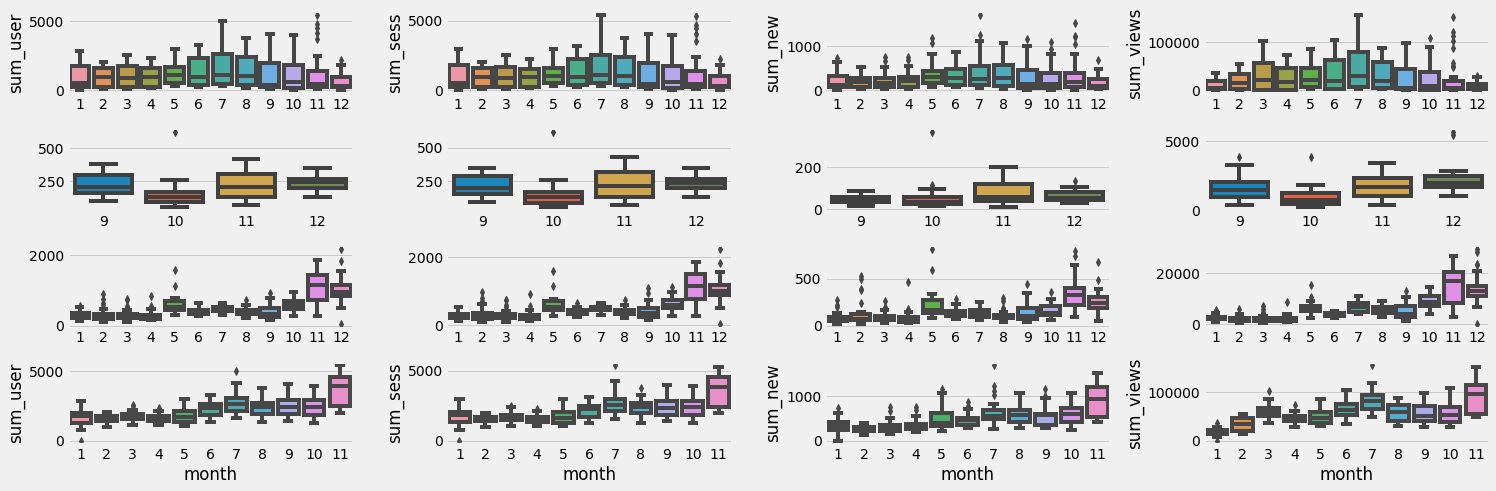

In [252]:
# 월별 분포
df['month'] = df['date'].dt.month

fig, axes = plt.subplots(4, 4, figsize=(21,7))
axes = axes.flatten()

cols = ['sum_user', 'sum_sess', 'sum_new', 'sum_views']

for i in range(len(cols)):
    sns.boxplot(data=df, x='month', y=cols[i], ax=axes[i])
    axes[i].set_xlabel('')

for i in range(4, 4+len(cols)):
    sns.boxplot(data=df.loc[df['year']==2018, :], x='month', y=cols[i-4], ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for i in range(8, 8+len(cols)):
    sns.boxplot(data=df.loc[df['year']==2019, :], x='month', y=cols[i-8], ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for i in range(12, 12+len(cols)):
    sns.boxplot(data=df.loc[df['year']==2020, :], x='month', y=cols[i-12], ax=axes[i])


plt.tight_layout();

- 12월 : 전체 그래프(맨 위)는 2018, 2019년도의 데이터에 영향을 많이 받음(2020년 데이터가 없음)

- 전반적으로 연말로 갈수록 y값이 증가하는 경향성을 보임

- 분기별로 분포를 확인해보자


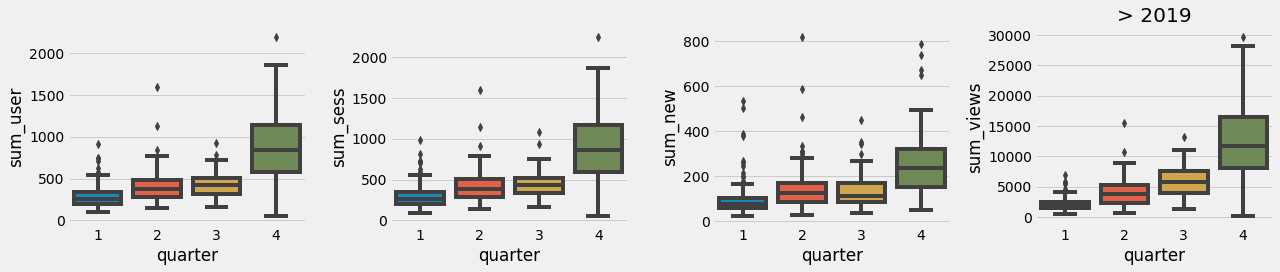

In [269]:
# 분기별 y 분포 확인(2019)
df['quarter'] = df.apply(lambda x: 1 if x['month'] in [1,2,3] else (2 if x['month'] in [4, 5, 6] else (3 if x['month'] in [7,8,9] else 4)), axis=1)

fig, axes = plt.subplots(1, 4, figsize=(18, 4))
axes = axes.flatten()

cols = ['sum_user', 'sum_sess', 'sum_new', 'sum_views']
for i in range(len(cols)):
    sns.boxplot(data=df.loc[df['year']==2019, :], x='quarter', y=cols[i], ax=axes[i])
plt.title('> 2019')
plt.tight_layout();

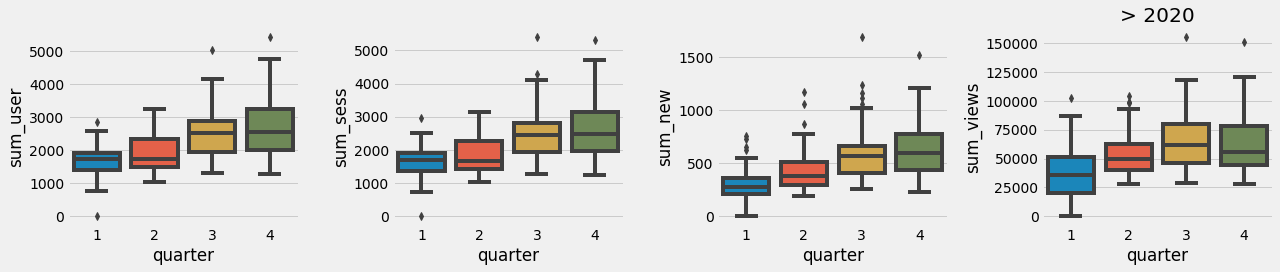

In [270]:
# 분기별 y 분포 확인(2020)
df['quarter'] = df.apply(lambda x: 1 if x['month'] in [1,2,3] else (2 if x['month'] in [4, 5, 6] else (3 if x['month'] in [7,8,9] else 4)), axis=1)

fig, axes = plt.subplots(1, 4, figsize=(18, 4))
axes = axes.flatten()

cols = ['sum_user', 'sum_sess', 'sum_new', 'sum_views']
for i in range(len(cols)):
    sns.boxplot(data=df.loc[df['year']==2020, :], x='quarter', y=cols[i], ax=axes[i])
plt.title('> 2020')
plt.tight_layout();

- 분기별로 증가하는 형태를 나타낸다기 보다는 전반적으로 dacon의 이용량이 증가함

# 총 정리
---

- 결정된 변수
    - 기존 y값들
    - y의 분포를 나타내는 통계량 - only ML
    - 대회 참가자 수
    - 공휴일 여부